# Лабораторная работа №2
## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Задание
    Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

    Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        - обработку пропусков в данных;
        - кодирование категориальных признаков;
        - масштабирование данных.

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Рассмотрим датасет Global Power-Plants:\
Dataset shows list of 35K powerplants with their generation capacity\
и исследуем его.

https://www.kaggle.com/datasets/ramjasmaurya/global-powerplants

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('powerplants (global) - global_power_plants.csv', sep=",")

In [4]:
data.shape

(34936, 16)

In [5]:
data.dtypes

country code                      object
country                           object
name of powerplant                object
capacity in MW                   float64
latitude                         float64
longitude                        float64
primary_fuel                      object
secondary fuel                    object
other_fuel 1                      object
other_fuel 2                      object
start date                       float64
owner of plant                    object
geolocation_source                object
generation_gwh_2020              float64
generation_data_source            object
estimated_generation_gwh_2020    float64
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

country code                         0
country                              0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
secondary fuel                   32992
other_fuel 1                     34660
other_fuel 2                     34844
start date                       17489
owner of plant                   14068
geolocation_source                 419
generation_gwh_2020              25277
generation_data_source           23536
estimated_generation_gwh_2020     1798
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((34936, 16), (34936, 7))

In [9]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка start date. Тип данных float64. Количество пустых значений 17489, 50.06%.
Колонка generation_gwh_2020. Тип данных float64. Количество пустых значений 25277, 72.35%.
Колонка estimated_generation_gwh_2020. Тип данных float64. Количество пустых значений 1798, 5.15%.


In [10]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,start date,generation_gwh_2020,estimated_generation_gwh_2020
0,NaN,NaN,119.50
1,NaN,NaN,18.29
2,NaN,NaN,18.72
3,NaN,NaN,174.91
4,NaN,NaN,350.80
...,...,...,...
34931,NaN,NaN,183.79
34932,NaN,NaN,73.51
34933,NaN,NaN,578.32
34934,NaN,NaN,2785.10


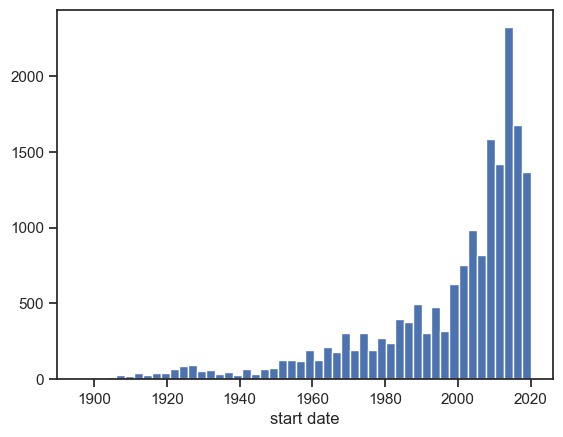

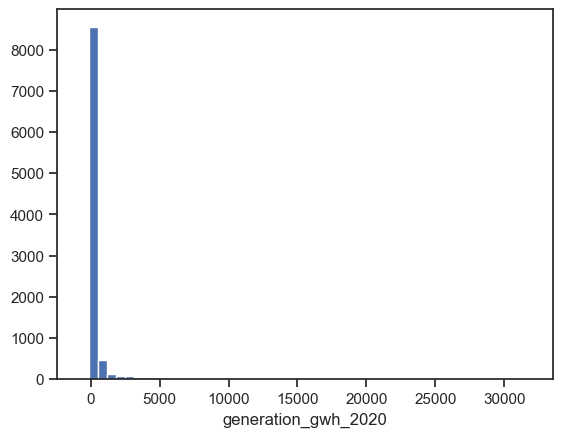

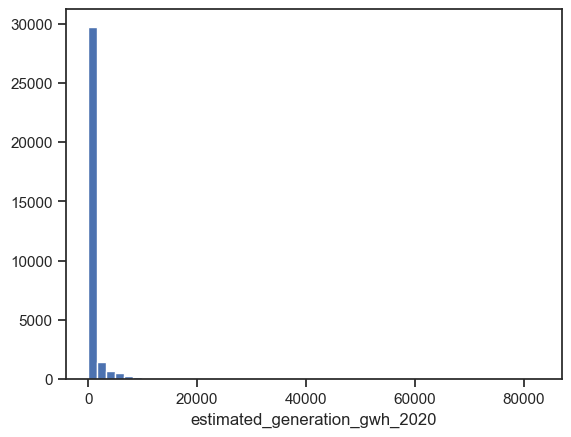

In [11]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [12]:
#введем необходимые функции, чтобы заполнить пропуски в числовых данных
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
strategies=['mean', 'median', 'most_frequent']
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    dataset[column] = data_num_imp
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [13]:
data['start date'] = data['start date'].fillna(0)
data.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,0.0,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,0.0,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,NaN,NaN,350.80


In [14]:
test_num_impute_col(data, 'generation_gwh_2020', strategies[1])

('generation_gwh_2020', 'median', 25277, 11.53, 11.53)

In [15]:
test_num_impute_col(data, 'estimated_generation_gwh_2020', strategies[1])

('estimated_generation_gwh_2020', 'median', 1798, 37.59, 37.59)

In [16]:
data.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,11.53,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,0.0,NaN,Wiki-Solar,11.53,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,0.0,NaN,Wiki-Solar,11.53,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,11.53,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,0.0,NaN,GEODB,11.53,NaN,350.80


Заполнинили "start date" и "generation_gwh_2020", "estimated_generation_gwh_2020" значениями "0" и "median" соответсвенно

In [17]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка secondary fuel. Тип данных object. Количество пустых значений 32992, 94.44%.
Колонка other_fuel 1. Тип данных object. Количество пустых значений 34660, 99.21%.
Колонка other_fuel 2. Тип данных object. Количество пустых значений 34844, 99.74%.
Колонка owner of plant. Тип данных object. Количество пустых значений 14068, 40.27%.
Колонка geolocation_source. Тип данных object. Количество пустых значений 419, 1.2%.
Колонка generation_data_source. Тип данных object. Количество пустых значений 23536, 67.37%.


Как видим удаление колонок в данном случае можно применить к колонкам "secondary_fuel", "other_fuel 1" и "other_fuel 2", т.к. очень маленький процент из всей выборки составляют реальные данные. Однако, чтобы не лишаться информации об этих колонках, заполним их значением "None"

In [18]:
data['secondary fuel'].unique()

array([nan, 'Oil', 'Solar', 'Gas', 'Other', 'Hydro', 'Coal', 'Petcoke',
       'Biomass', 'Waste', 'Cogeneration', 'Storage', 'Wind'],
      dtype=object)

In [19]:
data['other_fuel 1'].unique()

array([nan, 'Other', 'Oil', 'Biomass', 'Gas', 'Solar', 'Waste', 'Storage',
       'Hydro', 'Wind', 'Coal', 'Petcoke'], dtype=object)

In [20]:
data['other_fuel 2'].unique()

array([nan, 'Other', 'Gas', 'Solar', 'Biomass', 'Hydro', 'Oil', 'Wind',
       'Storage'], dtype=object)

In [21]:
data['owner of plant'].unique()

array([nan, "SociÃ©te AlgÃ©rienne de Production de l\\'ElectricitÃ©",
       'SociÃ©tÃ© AlgÃ©rienne de Production de lâ€™ElectricitÃ© (SPE)',
       ..., 'ZESCO', 'Maamba Collieries', 'Zambia Sugar'], dtype=object)

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
data[['secondary fuel']] = imp.fit_transform(data[['secondary fuel']])
data[['other_fuel 1']] = imp.fit_transform(data[['secondary fuel']])
data[['other_fuel 2']] = imp.fit_transform(data[['secondary fuel']])
data[['owner of plant']] = imp.fit_transform(data[['secondary fuel']])
data[['geolocation_source']] = imp.fit_transform(data[['secondary fuel']])
data[['generation_data_source']] = imp.fit_transform(data[['secondary fuel']])

data.head()


,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,None,None,None,0.0,None,None,11.53,None,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,None,None,None,0.0,None,None,11.53,None,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,None,None,None,0.0,None,None,11.53,None,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,None,None,None,0.0,None,None,11.53,None,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,None,None,None,0.0,None,None,11.53,None,350.80


Закодируем признаки колонки "primary_fuel" целочисленнми значениями

In [23]:
from sklearn.preprocessing import LabelEncoder
data['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [24]:
le = LabelEncoder()
data1 = le.fit_transform(data['primary_fuel'])
data1

array([ 5, 10, 10, ...,  5,  1,  5])

In [25]:
np.unique(data1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [26]:
data1 = le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
data1

array(['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro',
       'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste',
       'Wave and Tidal', 'Wind'], dtype=object)

In [27]:
pd.get_dummies(data['primary_fuel']).head()

,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
data

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,None,None,None,0.0,None,None,11.53,None,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,None,None,None,0.0,None,None,11.53,None,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,None,None,None,0.0,None,None,11.53,None,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,None,None,None,0.0,None,None,11.53,None,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,None,None,None,0.0,None,None,11.53,None,350.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,None,None,None,0.0,None,None,11.53,None,183.79
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,None,None,None,0.0,None,None,11.53,None,73.51
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,None,None,None,0.0,None,None,11.53,None,578.32
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,None,None,None,0.0,None,None,11.53,None,2785.10


Далее применим масштабирование MINMAX и на основе Z-оценки для колонки "longitude"

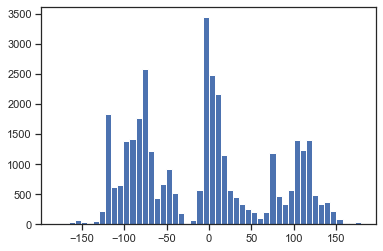

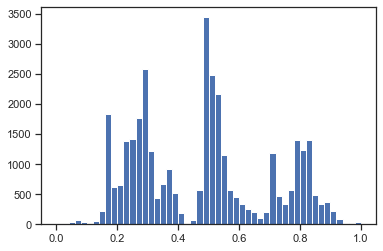

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['longitude']])
plt.hist(data['longitude'], 50)
plt.show()
plt.hist(sc1_data, 50)
plt.show()

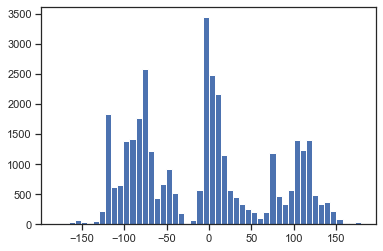

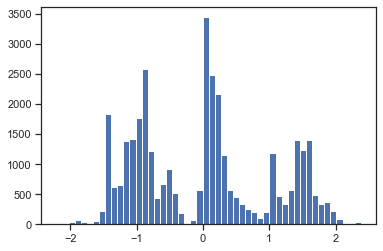

In [80]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['longitude']])
plt.hist(data['longitude'], 50)
plt.show()
plt.hist(sc2_data, 50)
plt.show()